In [2]:
import pickle
import pandas as pd
from report.plots import plot_loss_curve, plot_acc_curve
from report import basic_report

In [16]:
version = "version_3"
pd.set_option('display.max_rows', None)
metrics = pd.read_csv(f"./experiments/cnn/{version}/metrics.csv")
metrics['epoch'] = metrics['epoch'].fillna(method='ffill')

In [17]:
metrics.head()

,train_loss_step,train_acc_step,epoch,step,val_loss_step,val_acc_step,val_loss_epoch,val_acc_epoch,train_loss_epoch,train_acc_epoch
0,1.386927,0.21875,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.705212,0.25000,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.409159,0.21875,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.467675,0.21875,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.337597,0.43750,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import numpy as np
EPOCHS = metrics.shape[0] // 181

def log_metrics_dataframe(epochs):
    train_metrics = []
    valid_metrics = []
    epoch_train_metrics = []
    epoch_valid_metrics = []
    
    for n, batch in enumerate(np.split(metrics, epochs)):
        train_metrics.append(batch[["epoch", "step", "train_loss_step", "train_acc_step"]][:125])
        valid_metrics.append(batch[["epoch", "step", "val_loss_step", "val_acc_step"]][125:179])
        epoch_valid_metrics.append(batch[["epoch", "val_loss_epoch", "val_acc_epoch"]][179:180])
        epoch_train_metrics.append(batch[["epoch", "train_loss_epoch", "train_acc_epoch"]][180:181])
    
    train_metrics = pd.concat(train_metrics, axis=0)
    valid_metrics = pd.concat(valid_metrics, axis=0)
    epoch_train_metrics = pd.concat(epoch_train_metrics, axis=0)
    epoch_valid_metrics = pd.concat(epoch_valid_metrics, axis=0)
    epoch_metrics = pd.merge(epoch_train_metrics, epoch_valid_metrics, on='epoch')
    epoch_metrics["train_acc_epoch"] = epoch_metrics["train_acc_epoch"] * 100
    epoch_metrics["val_acc_epoch"] = epoch_metrics["val_acc_epoch"] * 100
    return train_metrics, valid_metrics, epoch_metrics

train_metrics, valid_metrics, epoch_metrics = log_metrics_dataframe(EPOCHS)

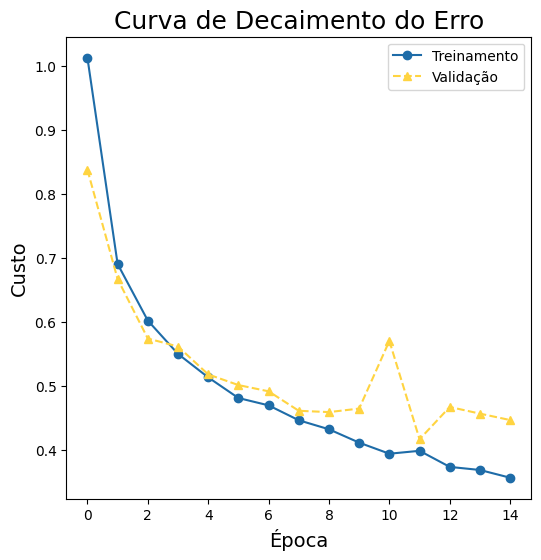

In [19]:
plot_loss_curve(epoch_metrics, show=True, save_as=f"./experiments/cnn/{version}/cnn-loss.png")

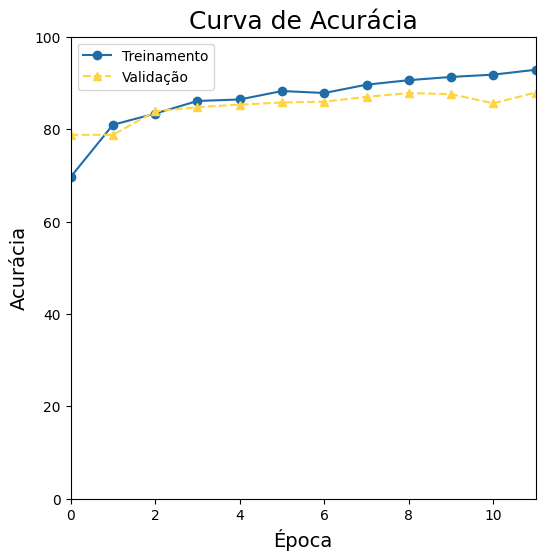

In [24]:
plot_acc_curve(epoch_metrics, show=True, save_as="./experiments/cnn/version_0/cnn-acc.png")

In [25]:
with open("./experiments/cnn/version_0/cnn-preds.dump", "rb") as f:
    truth_labels, preds_labels = pickle.load(f)

Classification report
              precision    recall  f1-score   support

      glioma      0.944     0.680     0.791       300
  meningioma      0.702     0.886     0.783       306
     notumor      0.931     0.968     0.949       405
   pituitary      0.976     0.937     0.956       300

    accuracy                          0.876      1311
   macro avg      0.888     0.868     0.870      1311
weighted avg      0.891     0.876     0.876      1311



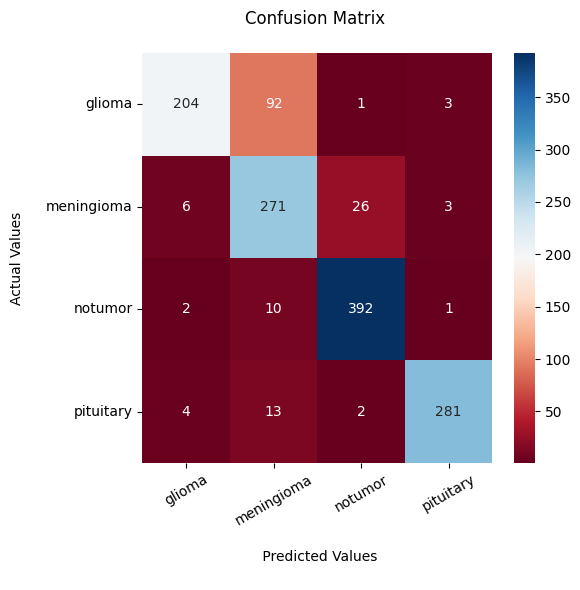

,gli,men,not,pit
glioma,204,92,1,3
meningioma,6,271,26,3
notumor,2,10,392,1
pituitary,4,13,2,281


In [26]:
basic_report(truth_labels, preds_labels, labels=[0,1,2,3], label_names=["glioma", "meningioma", "notumor", "pituitary"], show=True, 
             save_as="./experiments/cnn/version_0/cnn-confusion-matrix.png")